In [15]:
import opengrid as og
from opengrid.library import plotting as og_plot
import pandas as pd
from joule import meta, filter_meta

In [16]:
plt = og.plot_style()

-----------------------------------------------------------------------------------------------
Water
-----------------------------------------------------------------------------------------------


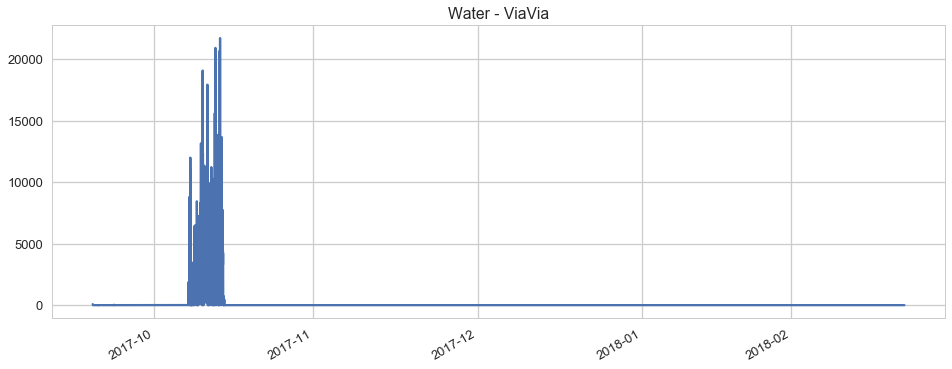

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


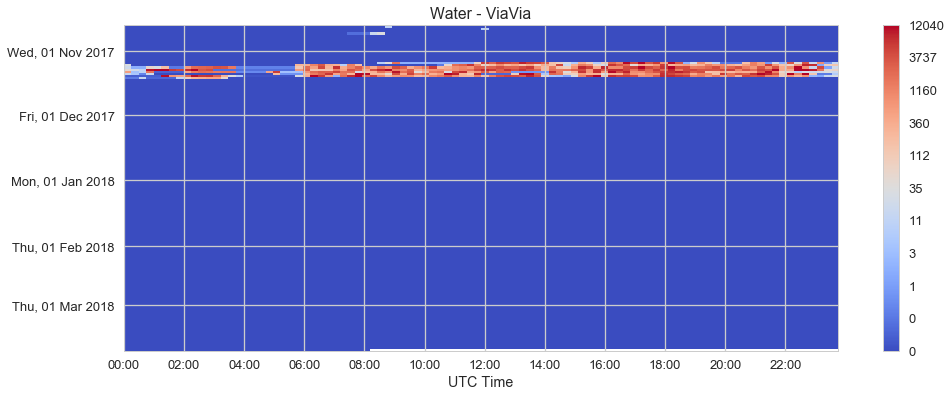

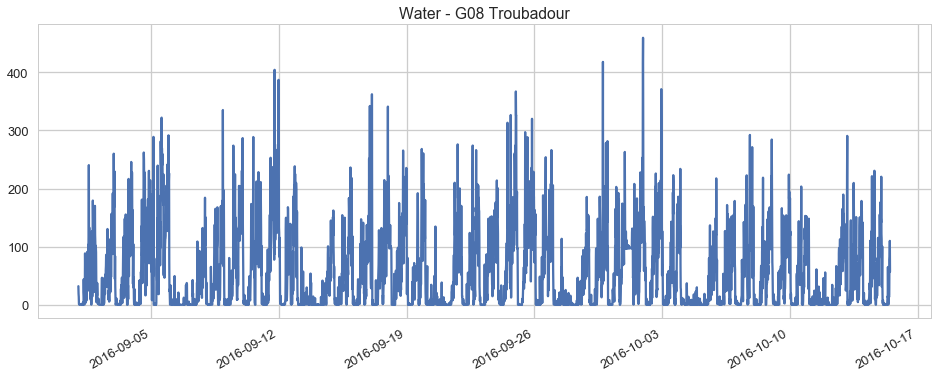

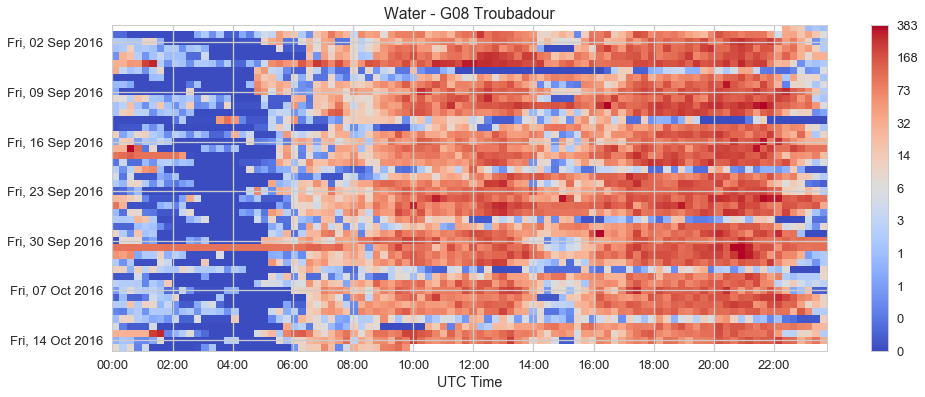

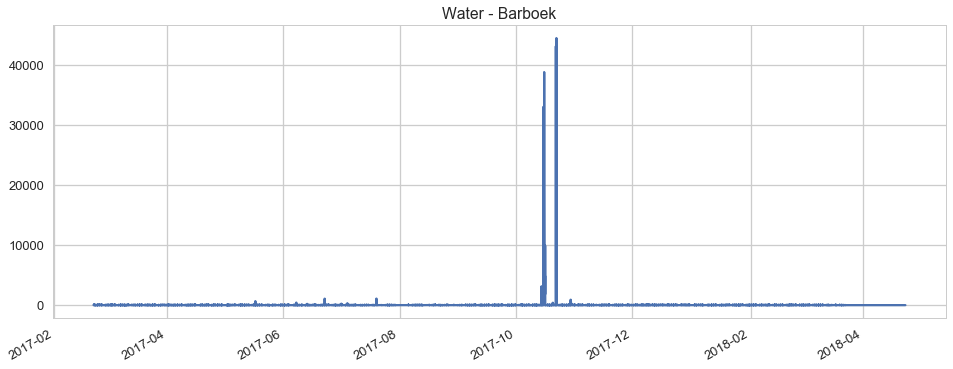

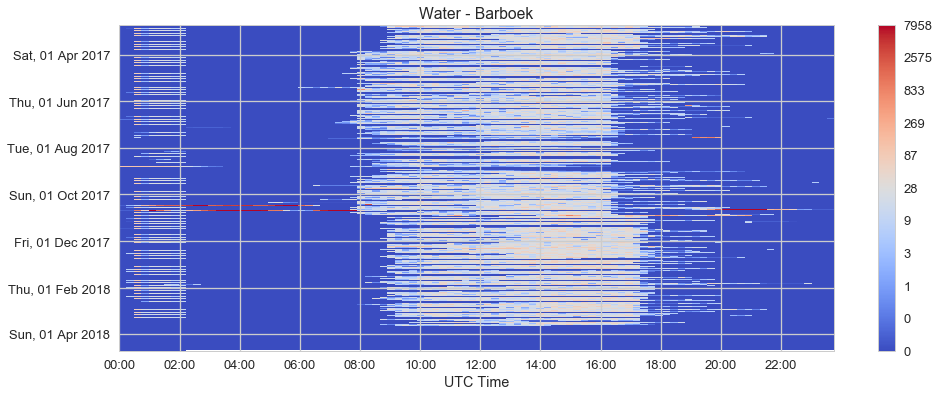

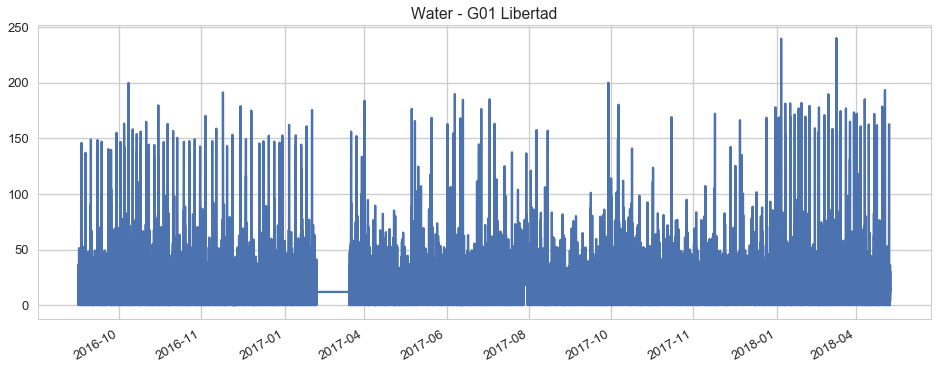

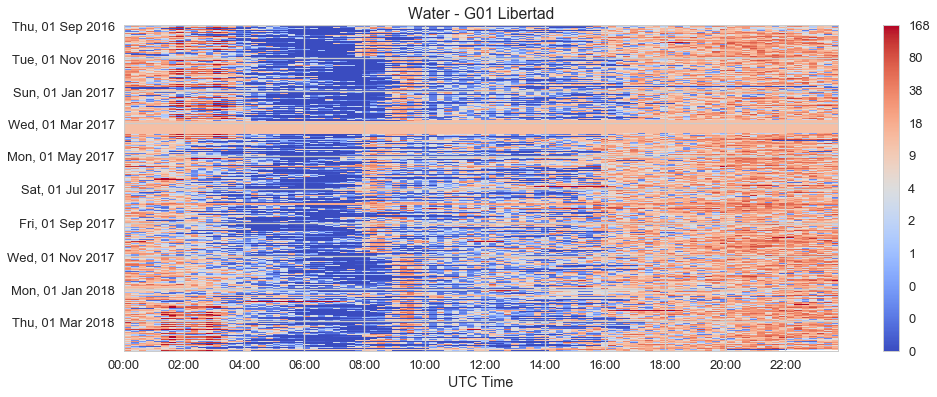

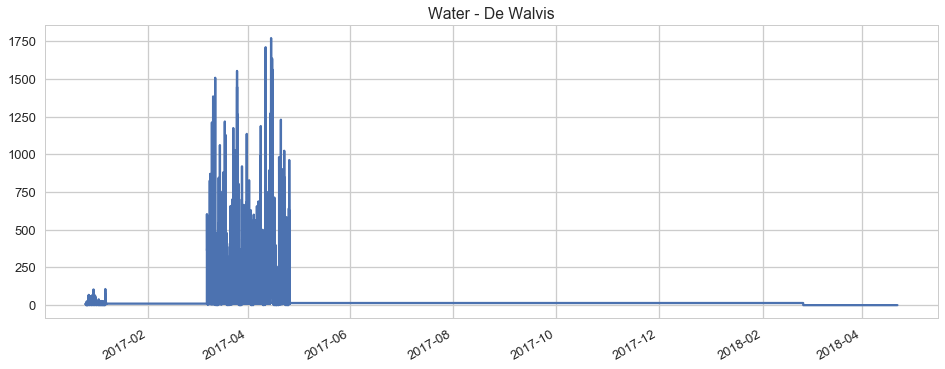

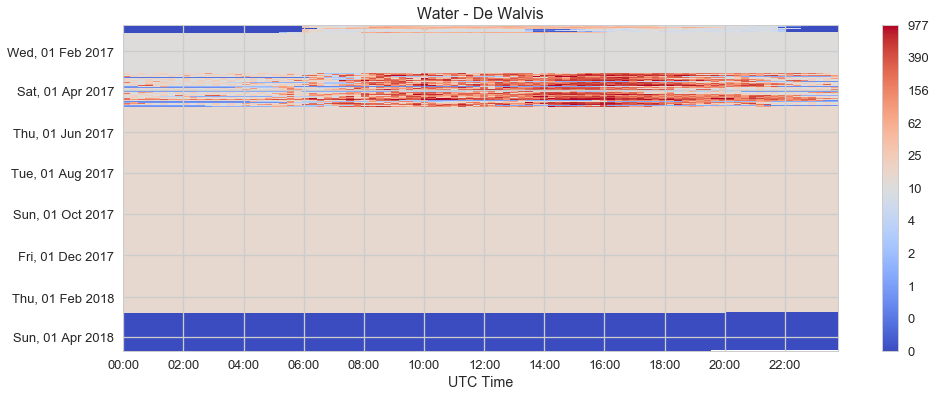

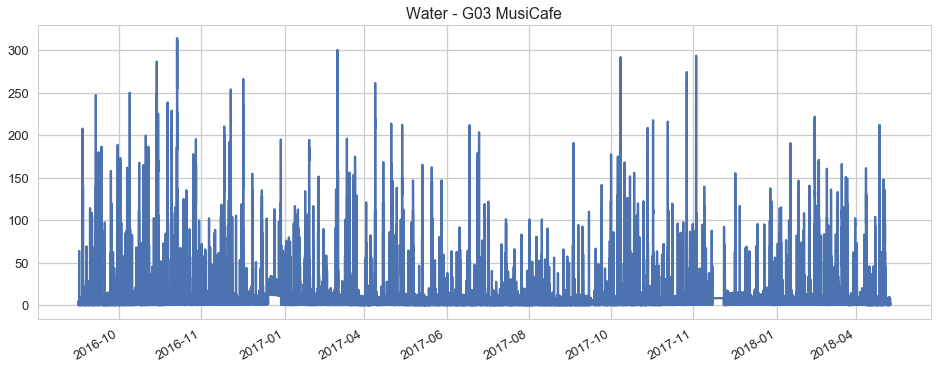

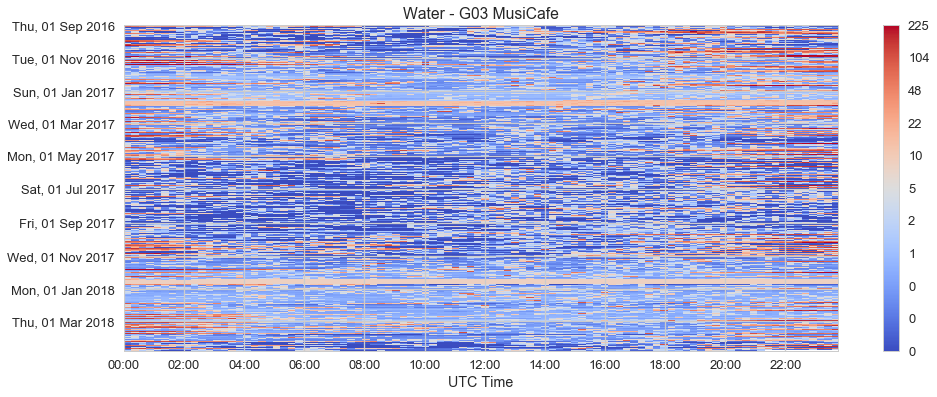

-----------------------------------------------------------------------------------------------
NaturalGas
-----------------------------------------------------------------------------------------------


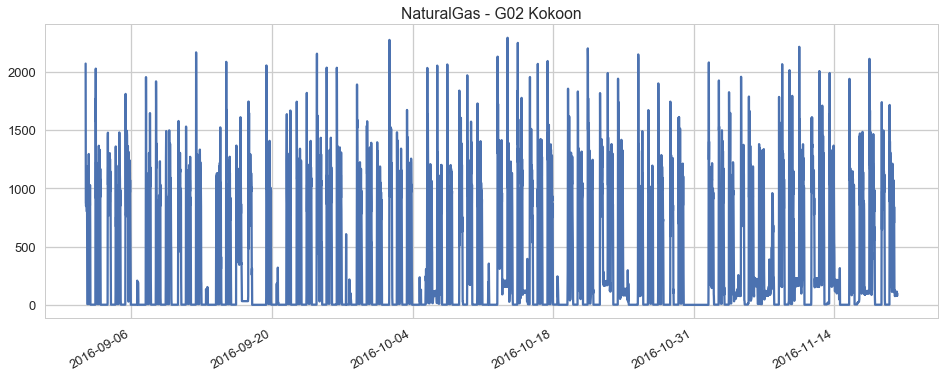

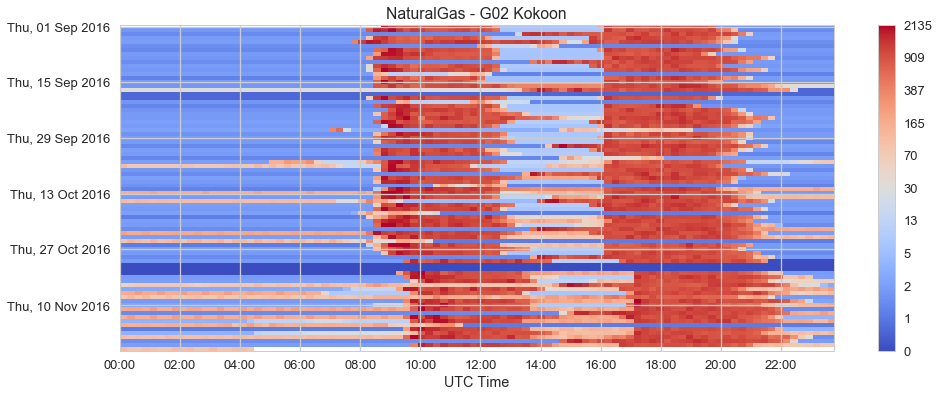

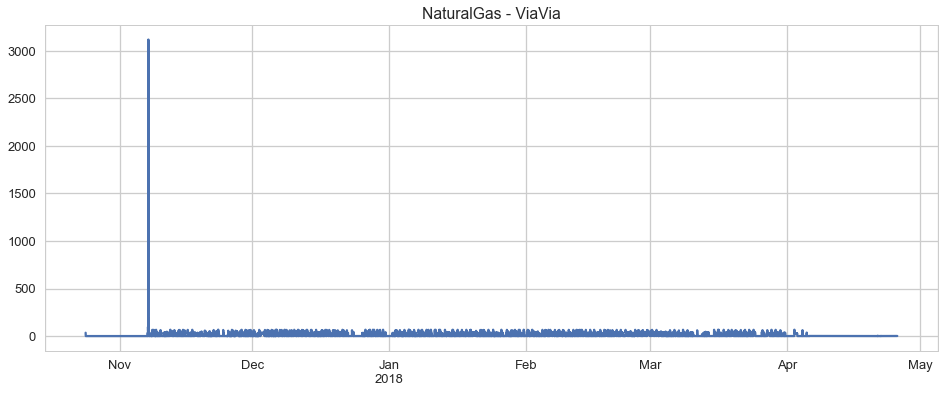

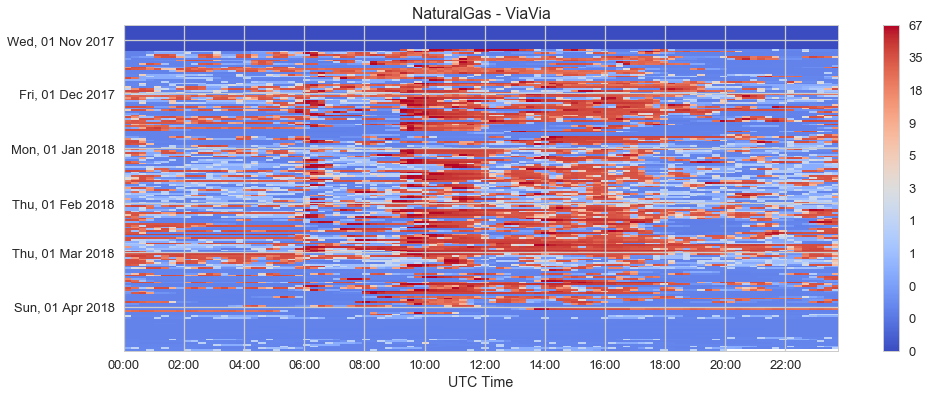

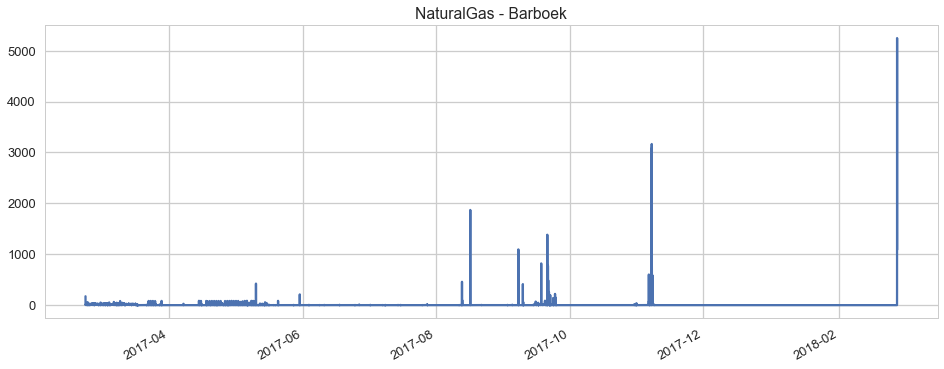

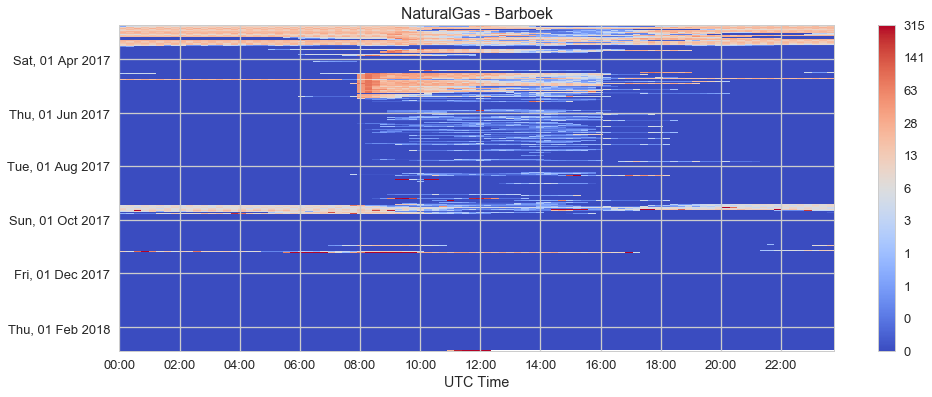

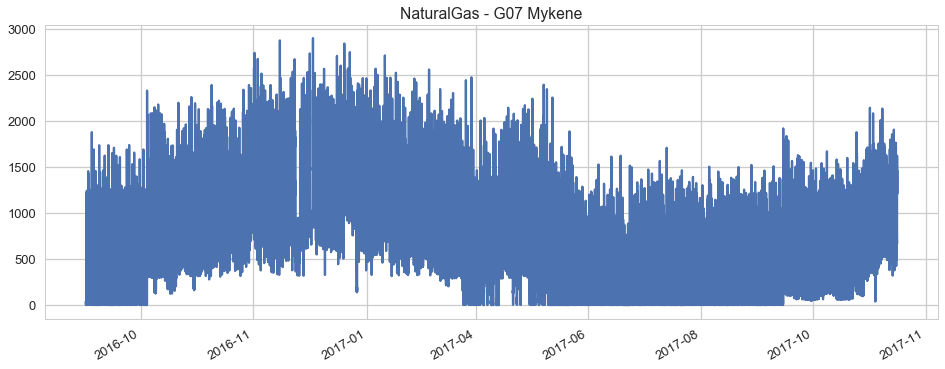

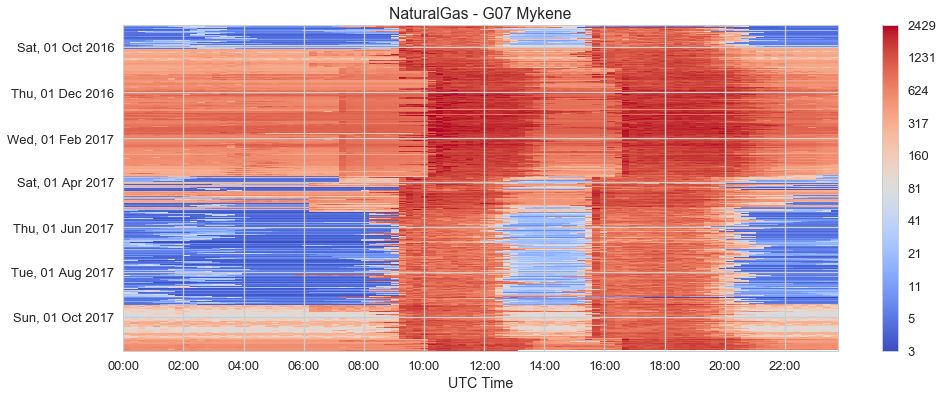

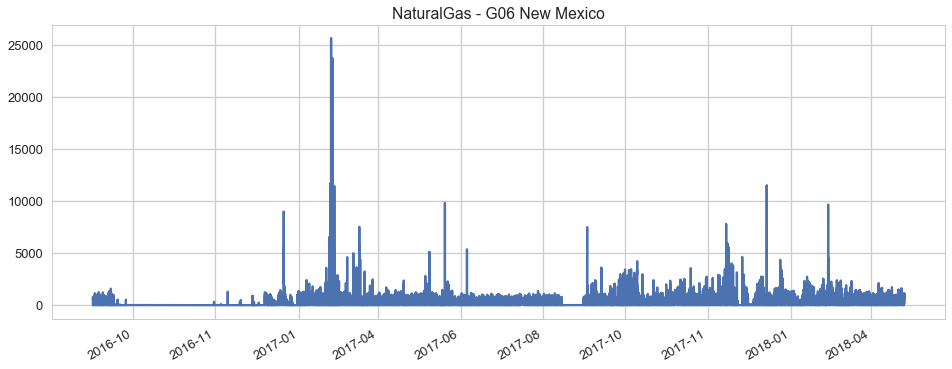

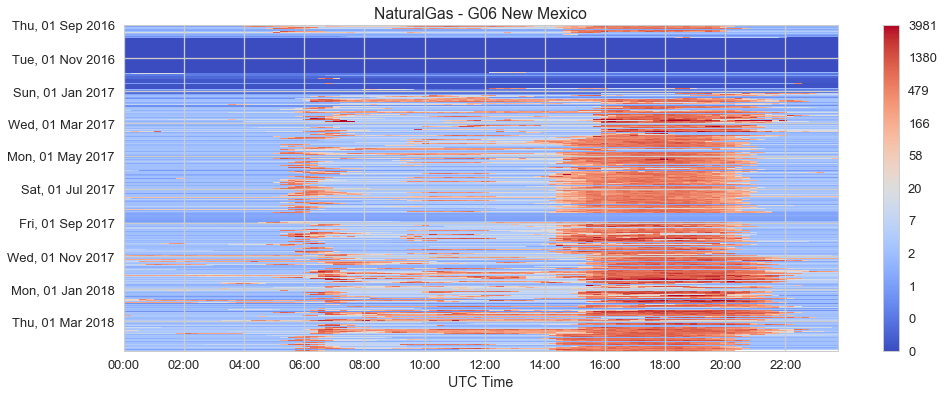

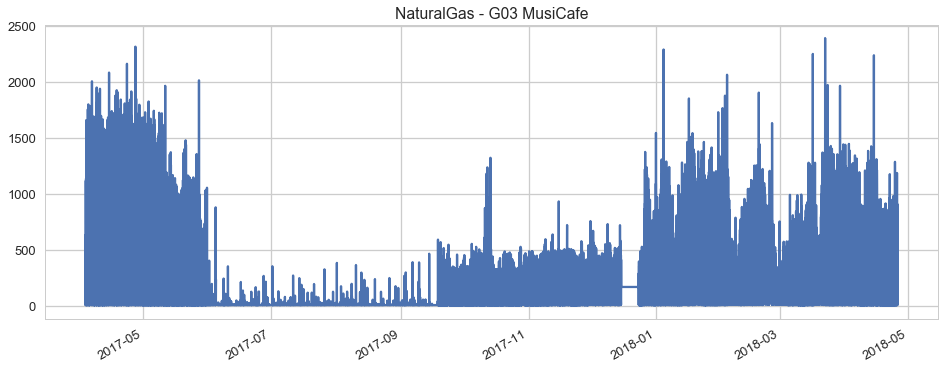

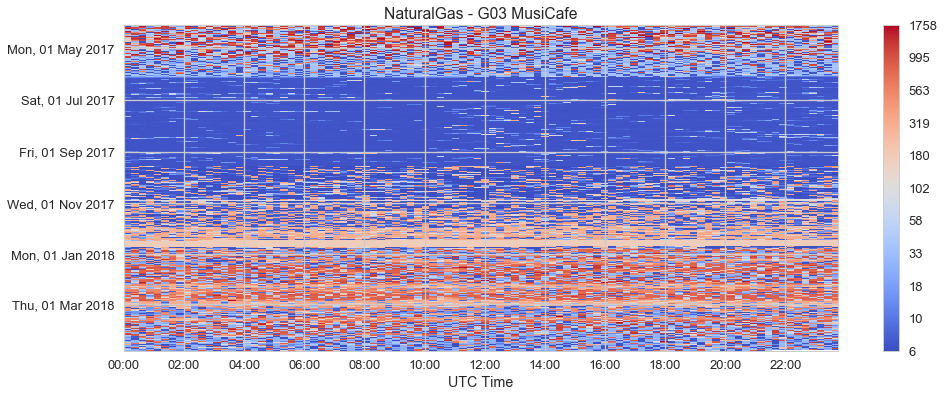

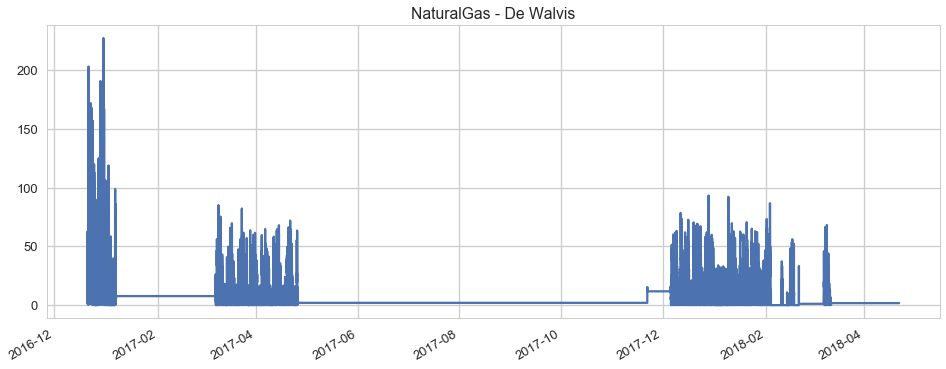

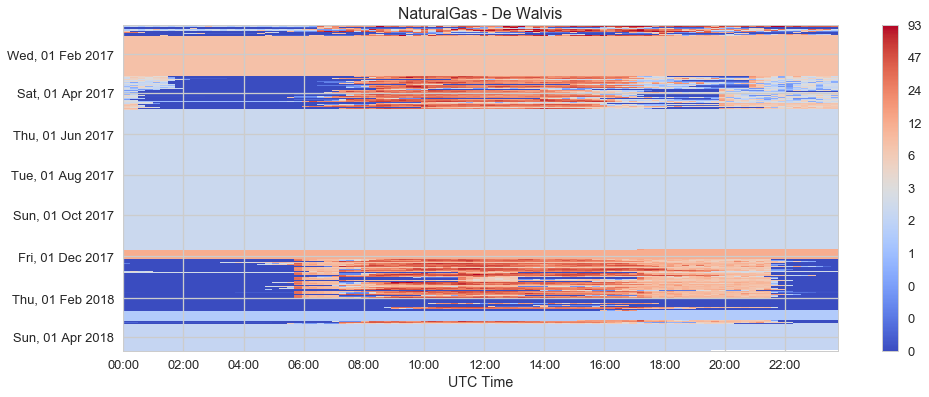

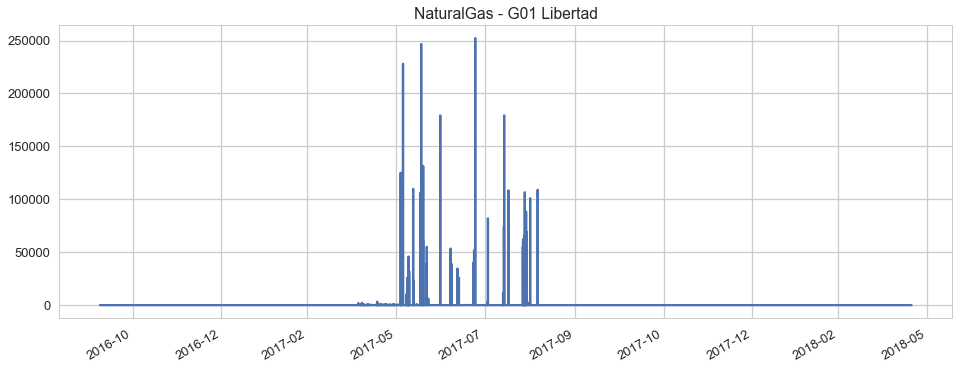

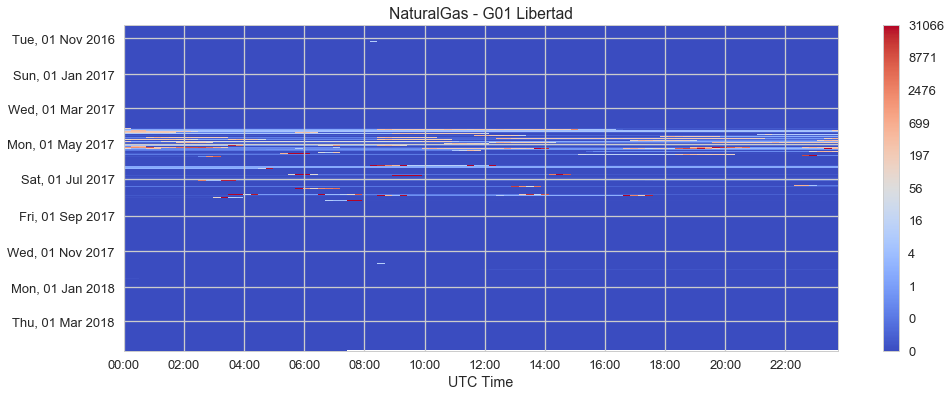

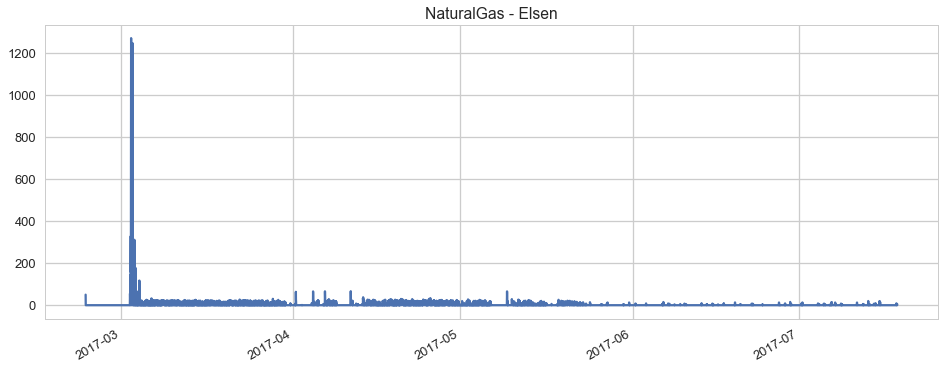

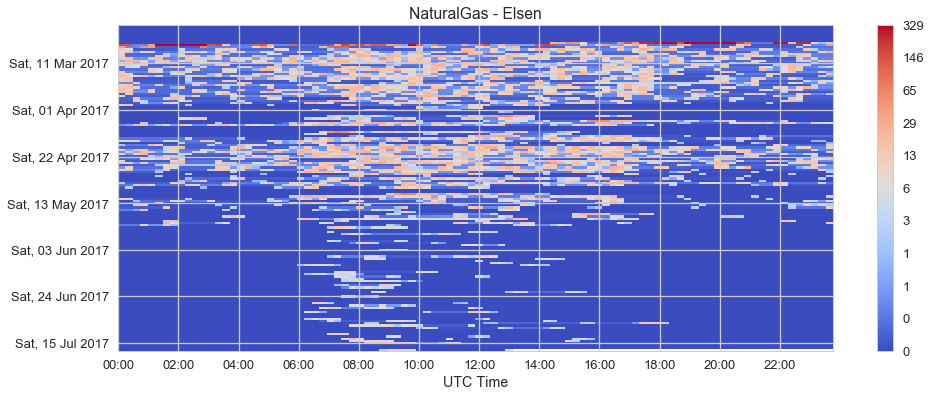

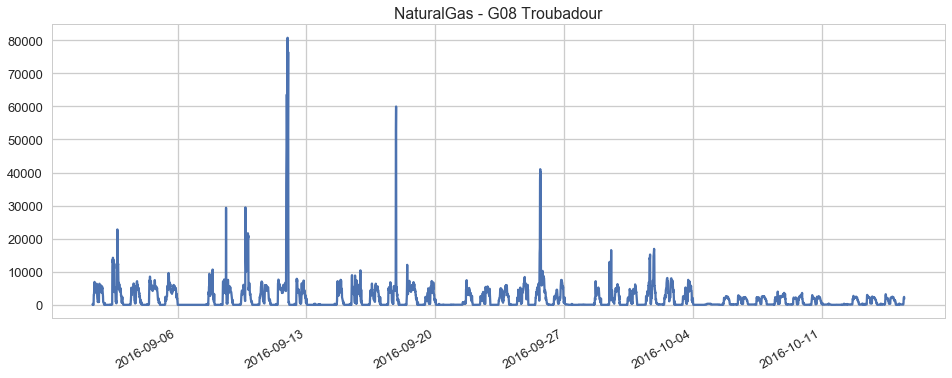

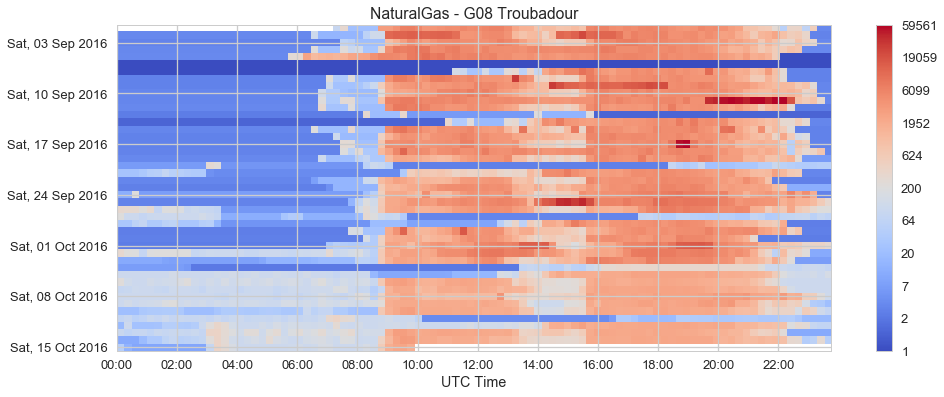

-----------------------------------------------------------------------------------------------
Electricity
-----------------------------------------------------------------------------------------------


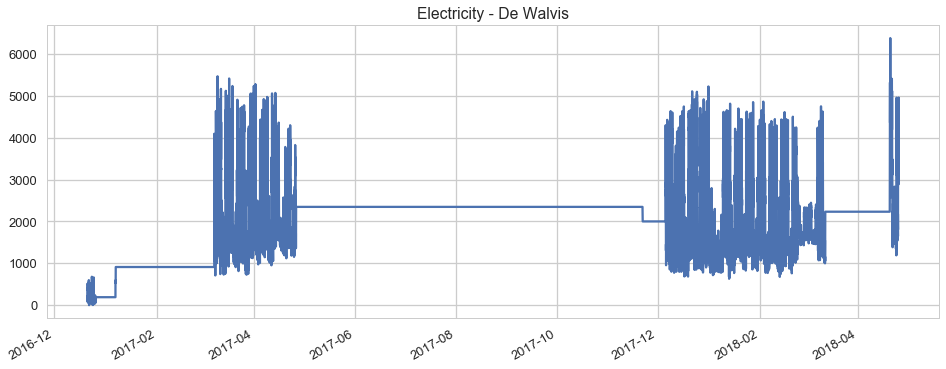

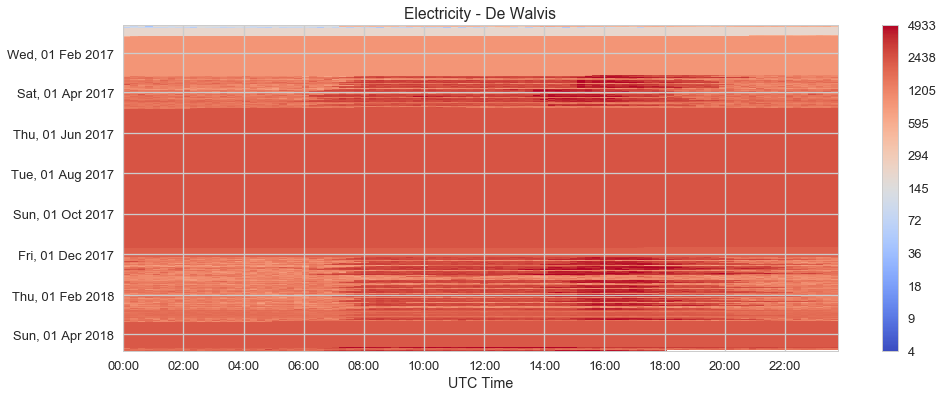

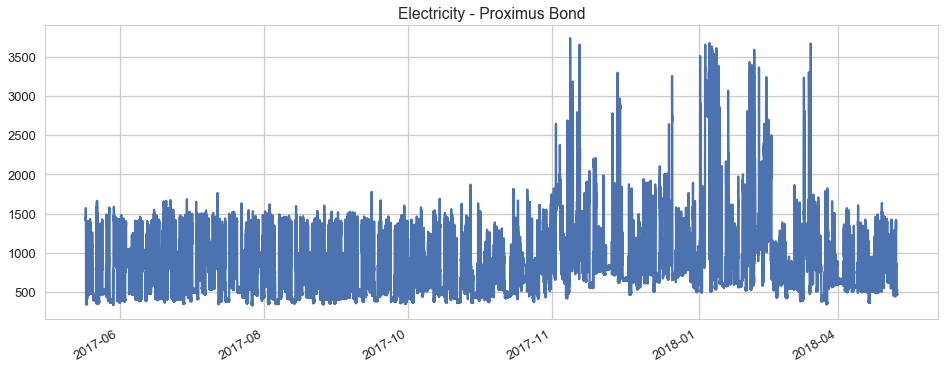

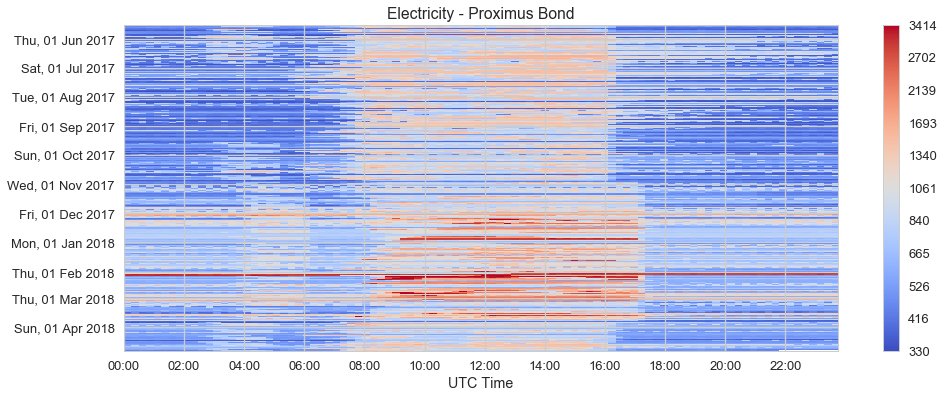

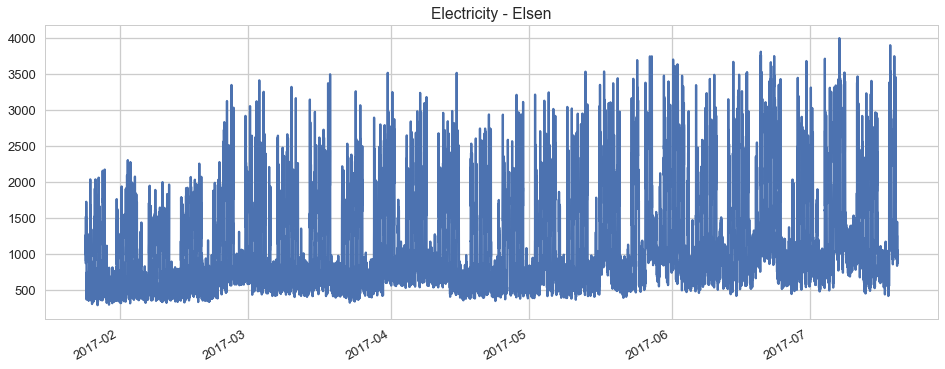

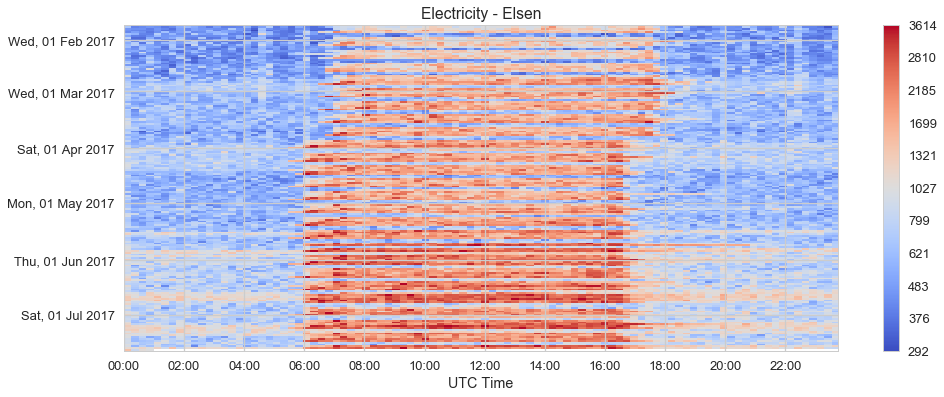

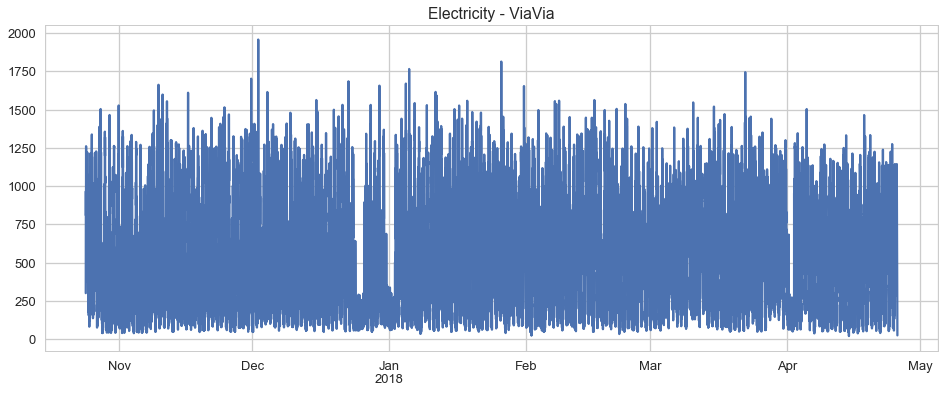

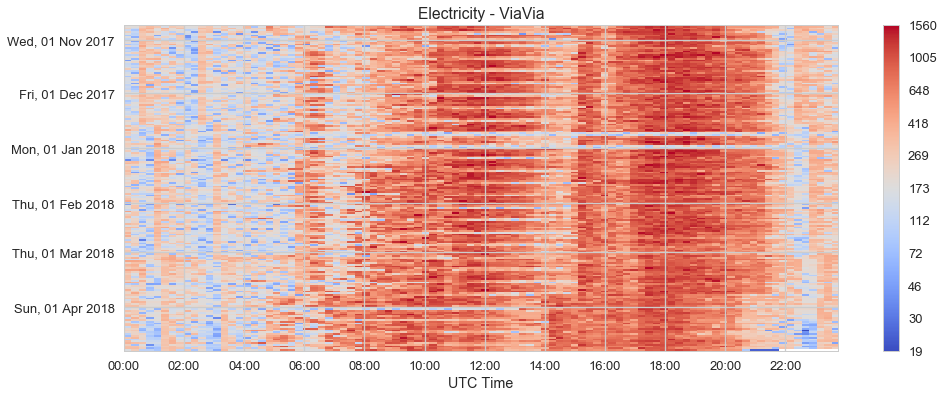

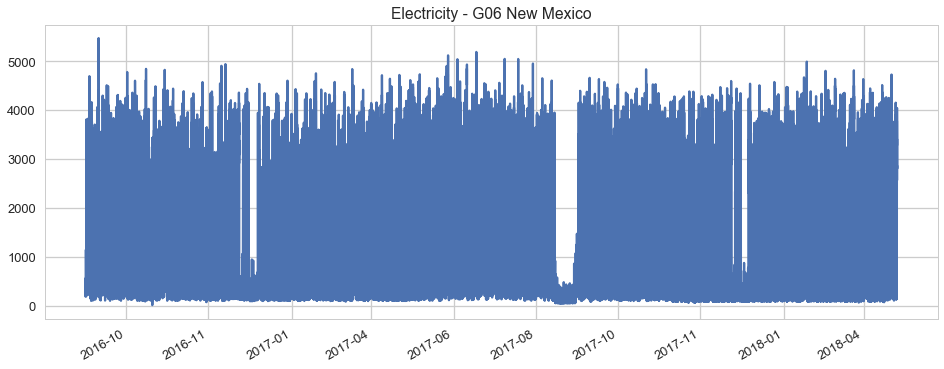

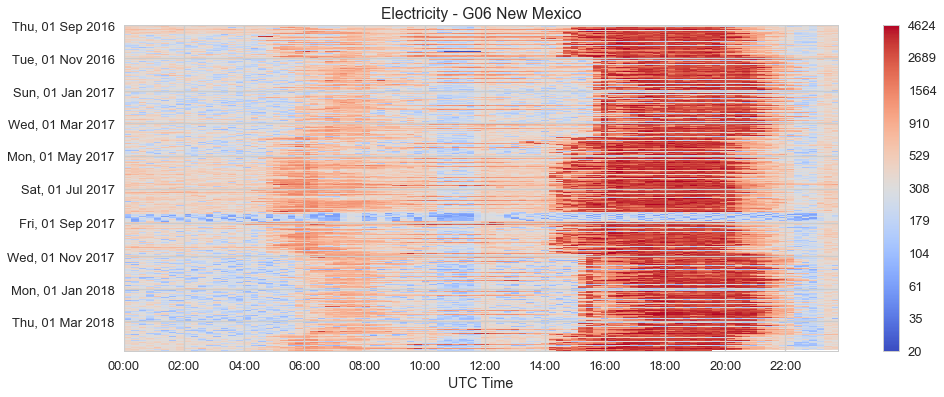

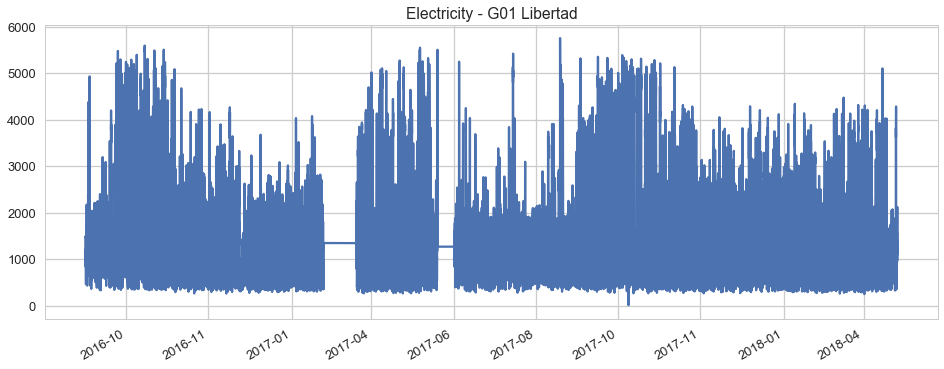

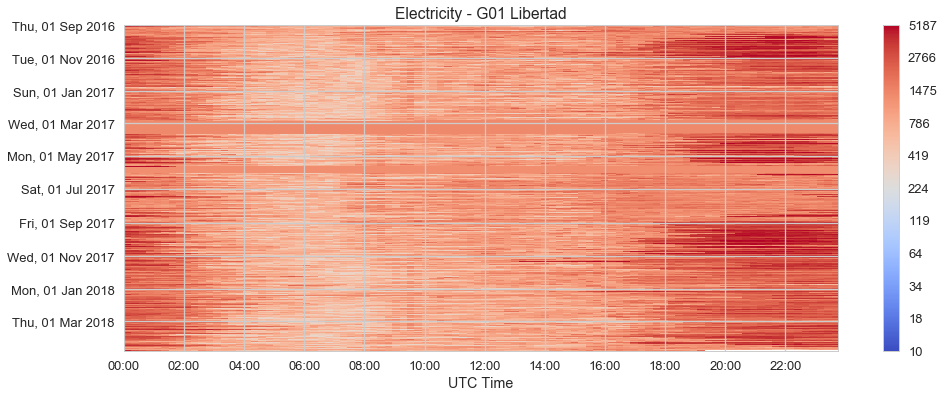

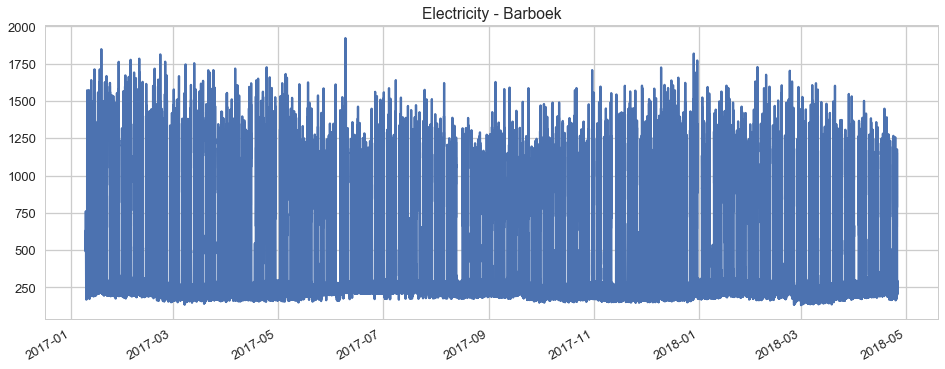

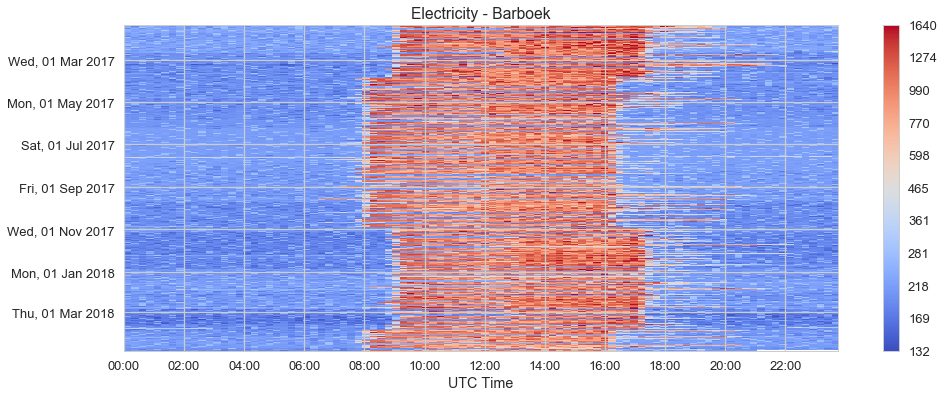

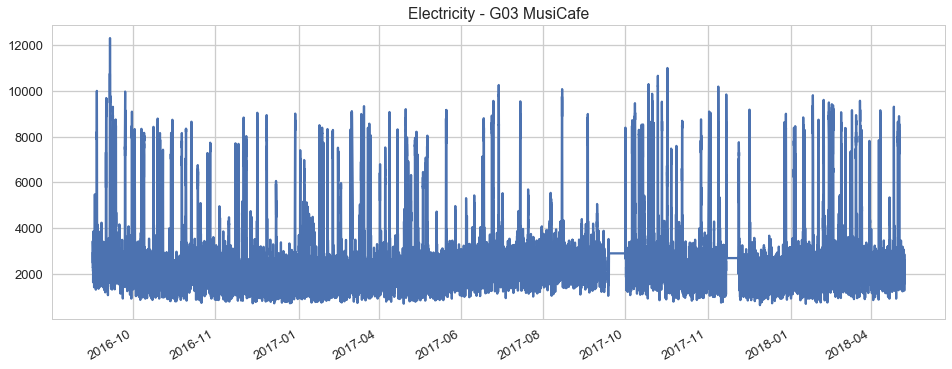

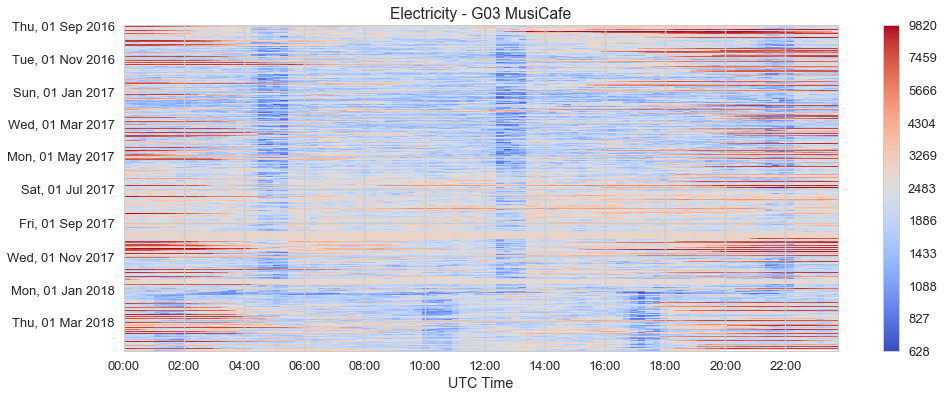

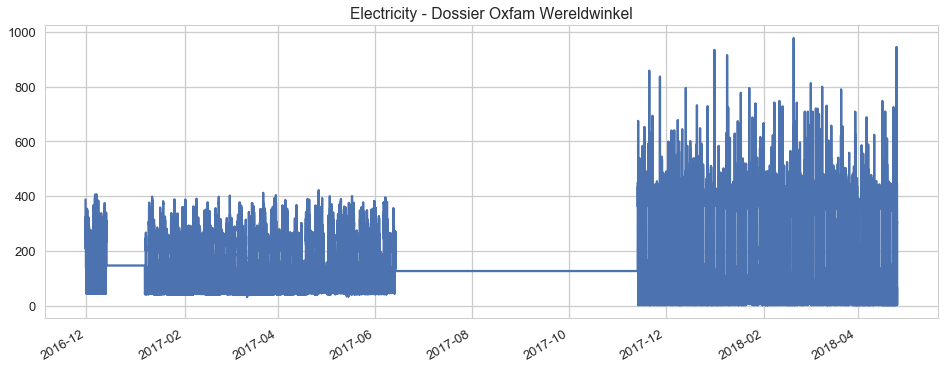

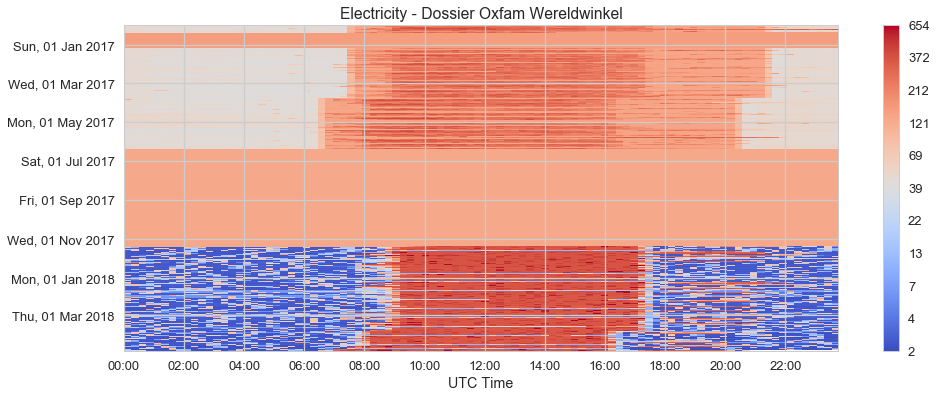

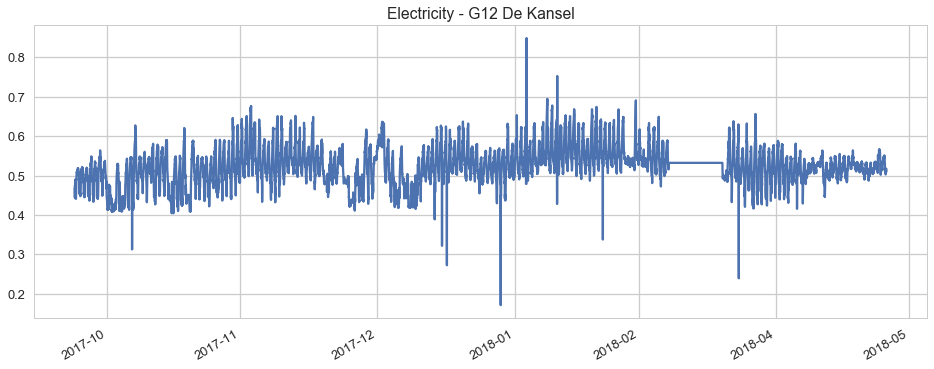

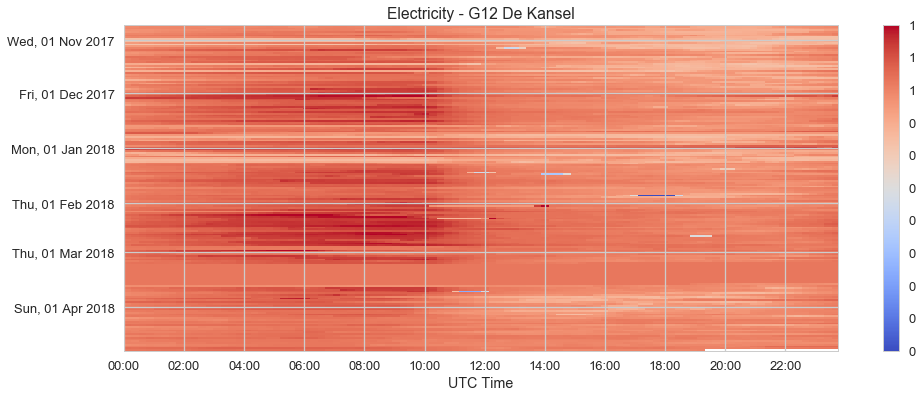

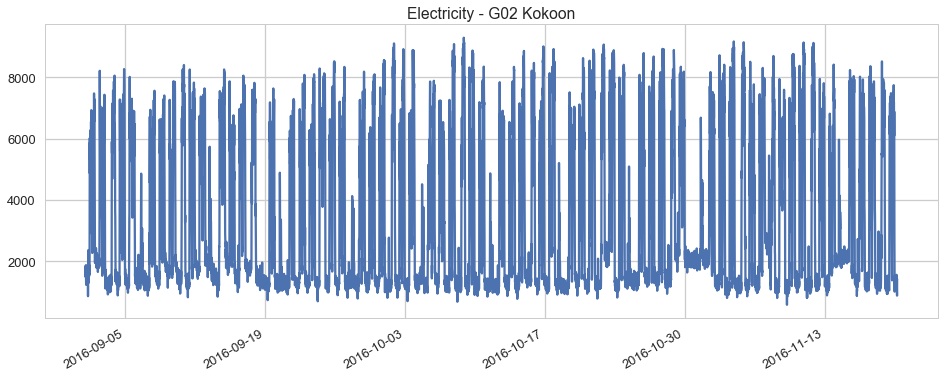

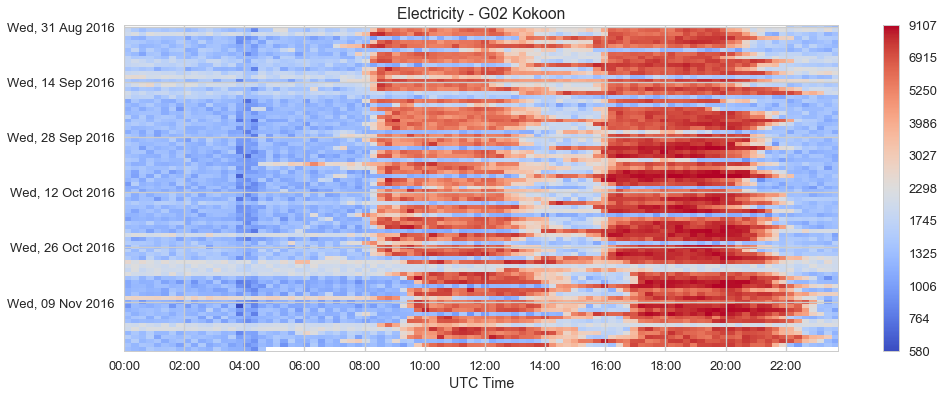

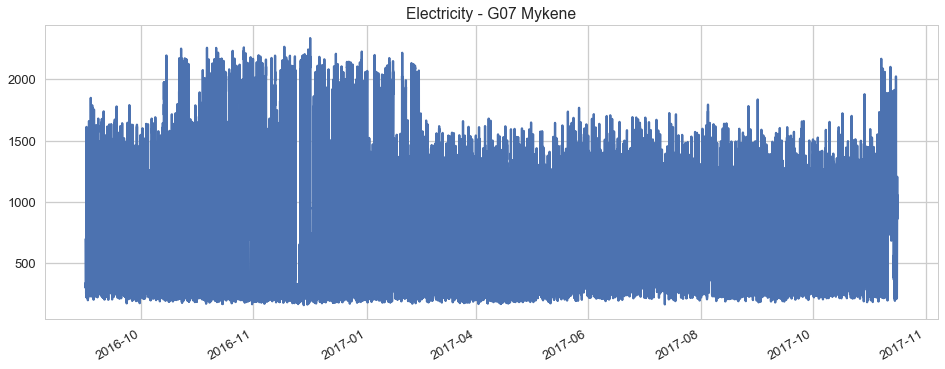

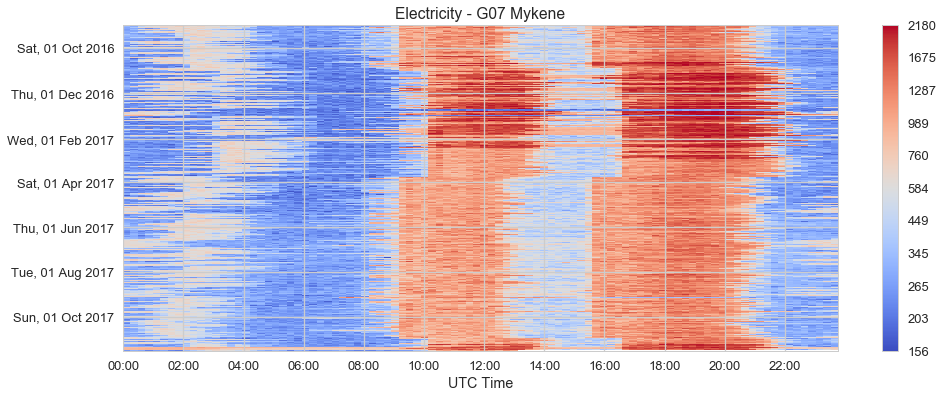

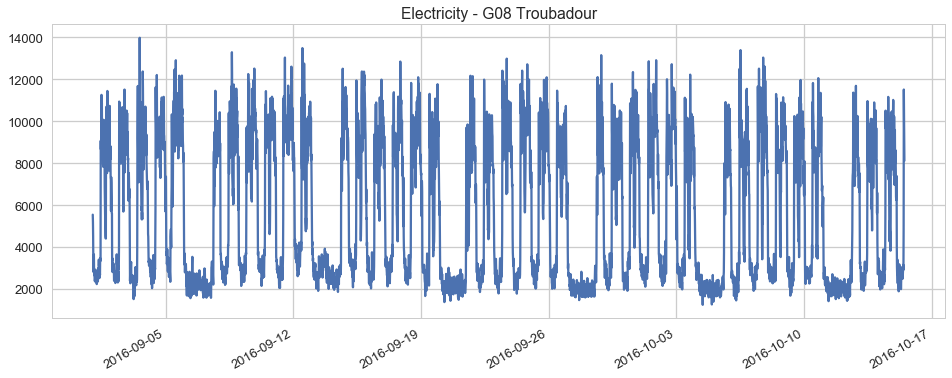

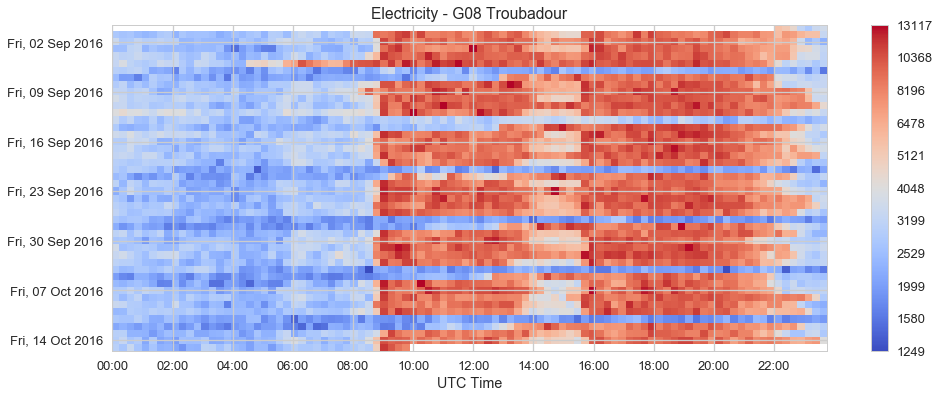

In [26]:
filters = ['Water', 'NaturalGas', 'Electricity']

for filter in filters:
    print('-----------------------------------------------------------------------------------------------')
    print(filter)
    print('-----------------------------------------------------------------------------------------------')
    filtered_meta = filter_meta(MeterType=filter)
    for building in filtered_meta['RecordNumber'].unique():
        ts = pd.read_pickle('data/{}_{}.pkl'.format(filter,building)).sum(axis=1)
        if not ts.empty:
            ax = ts.plot()
            plt.title('{} - {}'.format(filter, filter_meta(RecordNumber=building)['RecordName'].iloc[0]))
            plt.show()

            og_plot.carpet(ts, title='{} - {}'.format(filter, filter_meta(RecordNumber=building)['RecordName'].iloc[0]))
            plt.gcf().savefig("figures/carpetplot_" + filter + "_" + building + ".png")
            plt.show()